In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv(r"F:\study\CDA\课件资料\六、Python\python课件\逻辑回归-信用卡欺诈检测\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


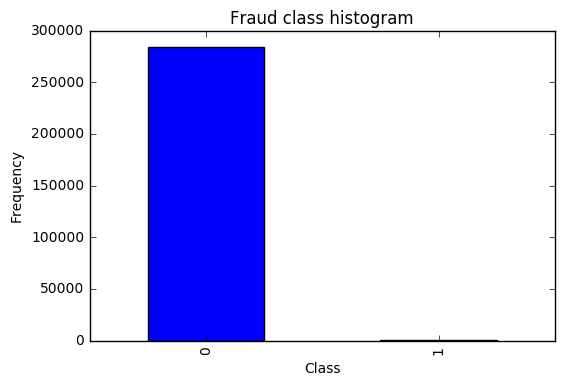

In [7]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [8]:
from sklearn.preprocessing import StandardScaler   # 预处理模块

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))  # 传入需要标准化的数据框的列名，reshape -1表示默认进行的计算，1表示维度，1列
data = data.drop(['Time','Amount'],axis=1)   # 删除两列，axis =1表示按照列删除，即删除特征。而axis=0是按行删除，是删除样本  
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
#数据包含数据和标签。分开   X 数据。  y标签lable
X = data.ix[:, data.columns != 'Class']  #第一个维度取所有数据，第二个维度取列名不等于class的列 ，ix 是通过行号和行标签进行取值  
y = data.ix[:, data.columns == 'Class']  # y 为标签，即类别  

# Number of data points in the minority class  下采样
number_records_fraud = len(data[data.Class == 1])  #统计异常值的个数  
fraud_indices = np.array(data[data.Class == 1].index)  #求出class=1的索引， #统计欺诈样本的下标，并变成矩阵的格式  

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index   #求出class=0的索引

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)   
# 参数1  随机采样集，参数2 采样个数   参数3  F不对原始数据进行替换
# 从正常值的索引中，选择和异常值相等个数的样本  
random_normal_indices = np.array(random_normal_indices)   #将随机采样的数据转换成np.array格式

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])  # 连接函数，按索引进行连接

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]  # 将索引定位到数据中   # 按照索引进行取值  
# 将数据集进行切分
X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']   #下采样后的训练集  
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']    #下采样后的标签  

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

#以上进行的是下采样，结果显示当前总共的数据量为 984 ， 正常值和异常值均为50% 

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


## 将数据集进行切分：数据集、验证集、测试集

In [10]:
from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import train_test_split   新版本的库进行了更新

# Whole dataset  对全部数据集进行切分，得到测试集（用原始的测试集进行测试）
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
# X是特征，y是数据，比例是0.3，30%是测试集；random_state = 0 必须写，类似于随机种子，按照固定的策略随机产生数据集，测试与验证才有意义
# 每次拿到的数据集相同。有利于做测试

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset   对Undersampled下采样数据集进行切分，得到训练集
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                 ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


recall 召回率
TP
FN

In [11]:
#Recall = TP/(TP+FN)  评估标准  关注目标数据  正样本（灵敏度）=正样本预测结果数/正样本实际数
# True Positive 模型预测为正的正样本
#False Negative 模型预测为负的正样本
from sklearn.linear_model import LogisticRegression   # 从线性回归模型中导入逻辑回归
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report  #导入几个评估标准
# confusion_matrix 混淆矩阵  recall_score  recall值

## 交叉验证 
5折交叉验证，把数据集平均分成5份，其中1份做验证集，其它做测试集
L1  L2 正则化             |W|  W^2  L1惩罚项|W|   L2惩罚项W^2，选小的，更稳定，
X    1    1    1    1       
W1   1    0    0    0      1
W2   1/4  1/4  1/4   1/4      （1/4）^2*4
泛化能力：可以广泛使用的能力，预测结果越稳定越好

In [12]:
#指定不同的乘法系数，然后利用交叉验证找到合适的参数，并把每个结果打印

def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters    正则化惩罚项（参数），惩罚权重参数
    c_param_range = [0.01,0.1,1,10,100]   # 用参数来控制过拟合的风险

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:  # for循环运用于每个参数
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')  #输出的是空格

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):  # for循环交叉验证，enumerate枚举

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')   
            # 建模，lr=逻辑回归，C是惩罚力度，penalty乘法方案小写的L1

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())  
            #训练时indices[0]

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)  # 测试时indices[1]

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            # recall 是一种评估指标，需要传入真实值和预测值
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)  # 计算5次交叉验证的均值
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c
# 交叉验证的结果高并没有用，不能代表测试集

In [16]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

# 结果是交叉验证的结果recall   不能代表测试结果

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.931506849315
Iteration  2 : recall score =  0.917808219178
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.959459459459
Iteration  5 : recall score =  0.969696969697

Mean recall score  0.95569429953

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.86301369863
Iteration  3 : recall score =  0.915254237288
Iteration  4 : recall score =  0.945945945946
Iteration  5 : recall score =  0.909090909091

Mean recall score  0.89652397189

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.849315068493
Iteration  2 : recall score =  0.890410958904
Iteration  3 : recall score =  0.966101694915
Iteration  4 : recall sc

In [17]:
# 下面用验证集进行验证
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 混淆矩阵
x 预测值
y 真实值

Recall metric in the testing dataset:  0.938775510204


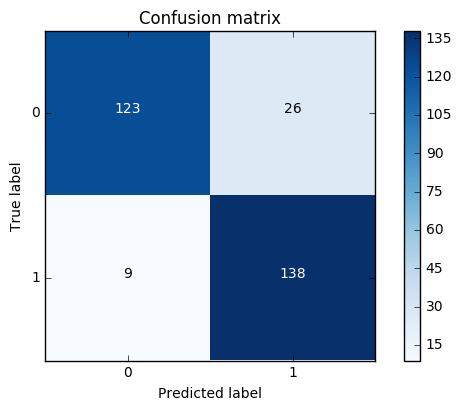

In [18]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')   #建立回归模型
lr.fit(X_train_undersample,y_train_undersample.values.ravel())   #进行模型训练
y_pred_undersample = lr.predict(X_test_undersample.values)   #预测值

# Compute confusion matrix   http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)   # 传入两个值得到4个结果值，就可以画出图像了
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

分析上图：recall= 137/（137+10）=0.93   下采样的测试集：93%的准确率，其实是没有用的
要用整体的测试集预测才行
20 被误杀，10路网之鱼

Recall metric in the testing dataset:  0.918367346939


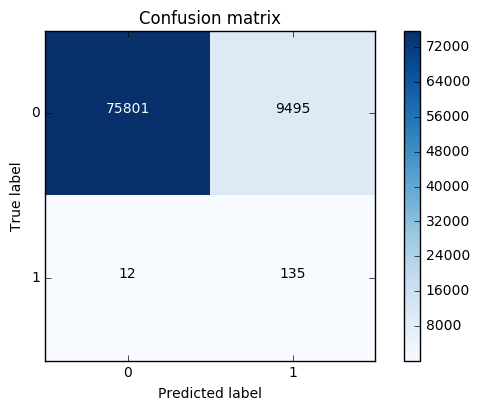

In [19]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

解释上图：异常样本134，误杀8948，增大了对异常值处理的工作量
        下采样数据的结果，数据少导致的误杀

In [20]:
best_c = printing_Kfold_scores(X_train,y_train)  # X_train,y_train不均衡的数据
#结果显示 recall值不高，所以拿到数据如果不均衡先进行处理（上、下采样），虽然误杀低了，但很多异常都没有检测出来

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.492537313433
Iteration  2 : recall score =  0.602739726027
Iteration  3 : recall score =  0.683333333333
Iteration  4 : recall score =  0.569230769231
Iteration  5 : recall score =  0.45

Mean recall score  0.559568228405

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.567164179104
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.683333333333
Iteration  4 : recall score =  0.584615384615
Iteration  5 : recall score =  0.525

Mean recall score  0.595310250644

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.55223880597
Iteration  2 : recall score =  0.616438356164
Iteration  3 : recall score =  0.716666666667
Iteration  4 : recall score = 

Recall metric in the testing dataset:  0.619047619048


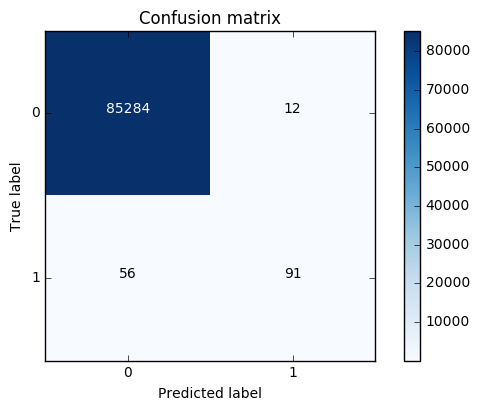

In [21]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)   # lr.predict进行预测，结果是0或1，默认的阈值是0.5

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.972789115646
Recall metric in the testing dataset:  0.938775510204
Recall metric in the testing dataset:  0.877551020408
Recall metric in the testing dataset:  0.823129251701
Recall metric in the testing dataset:  0.768707482993
Recall metric in the testing dataset:  0.585034013605


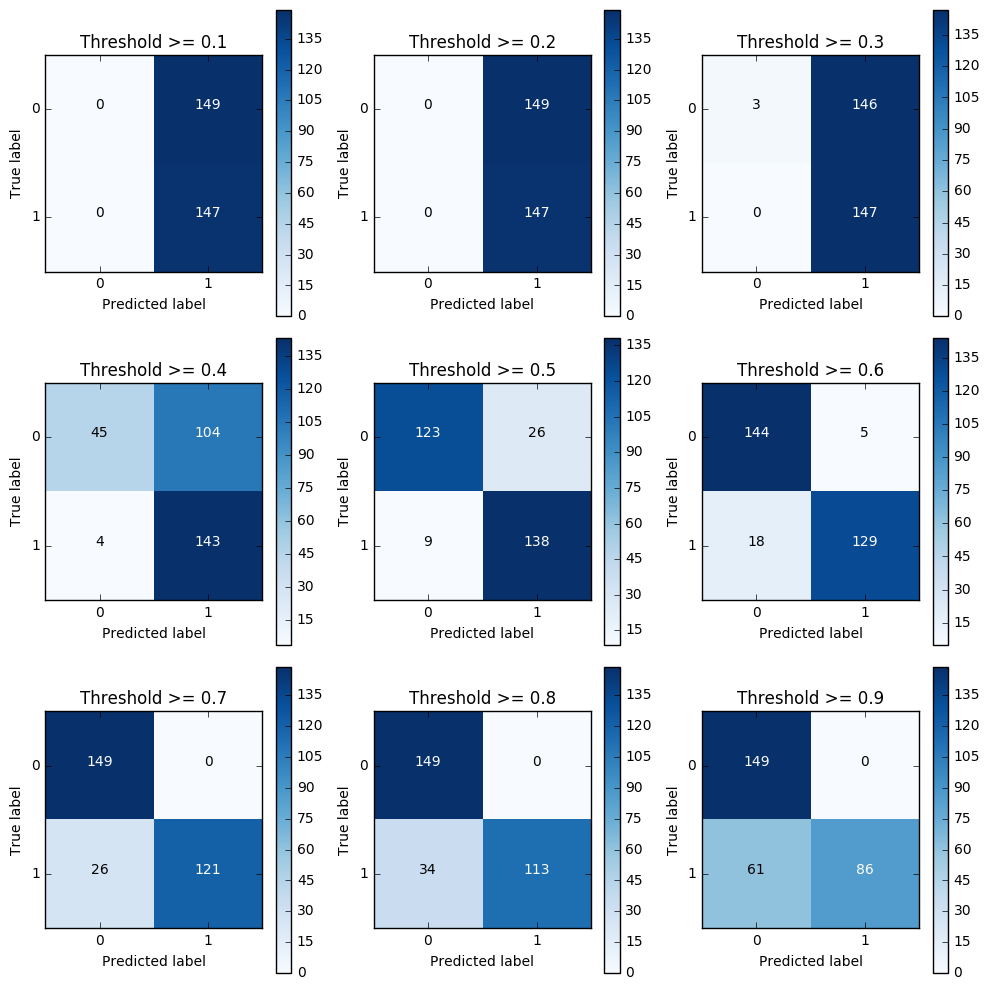

In [22]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)  # 预测概率值

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   # 指定了一系列的阈值，>阈值的是异常样本

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)  # 画3*3 的子图  共9个
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i)

In [ ]:
第一个图  阈值0.1  所有的值都预测成了异常值，阈值太小了，大于10%就认为异常了，错杀太多  racall为1，但没有用
recall高但工作量大


In [24]:
import pandas as pd
from imblearn.over_sampling import SMOTE  #上采样库，导入SMOTE算法  处理不平衡数据的库
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

ImportError: A sklearn version of at least 0.19.0 is required to use imbalanced-learn. 0.17.1 was found. Please upgrade sklearn

In [ ]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [ ]:
oversampler=SMOTE(random_state=0)  #实例化参数，只对训练集增广，测试集不动  
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)  # 使 0 和 1 样本相等  

In [ ]:
len(os_labels[os_labels==1])

In [ ]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

In [ ]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()